### 常微分方程求解迭代

方程为


$ y' = 2xy, y(0) = 1 $


得到的解为$ y = e^{x^2} $

1. Euler 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
def f(x,y):
    return 2 * x * y

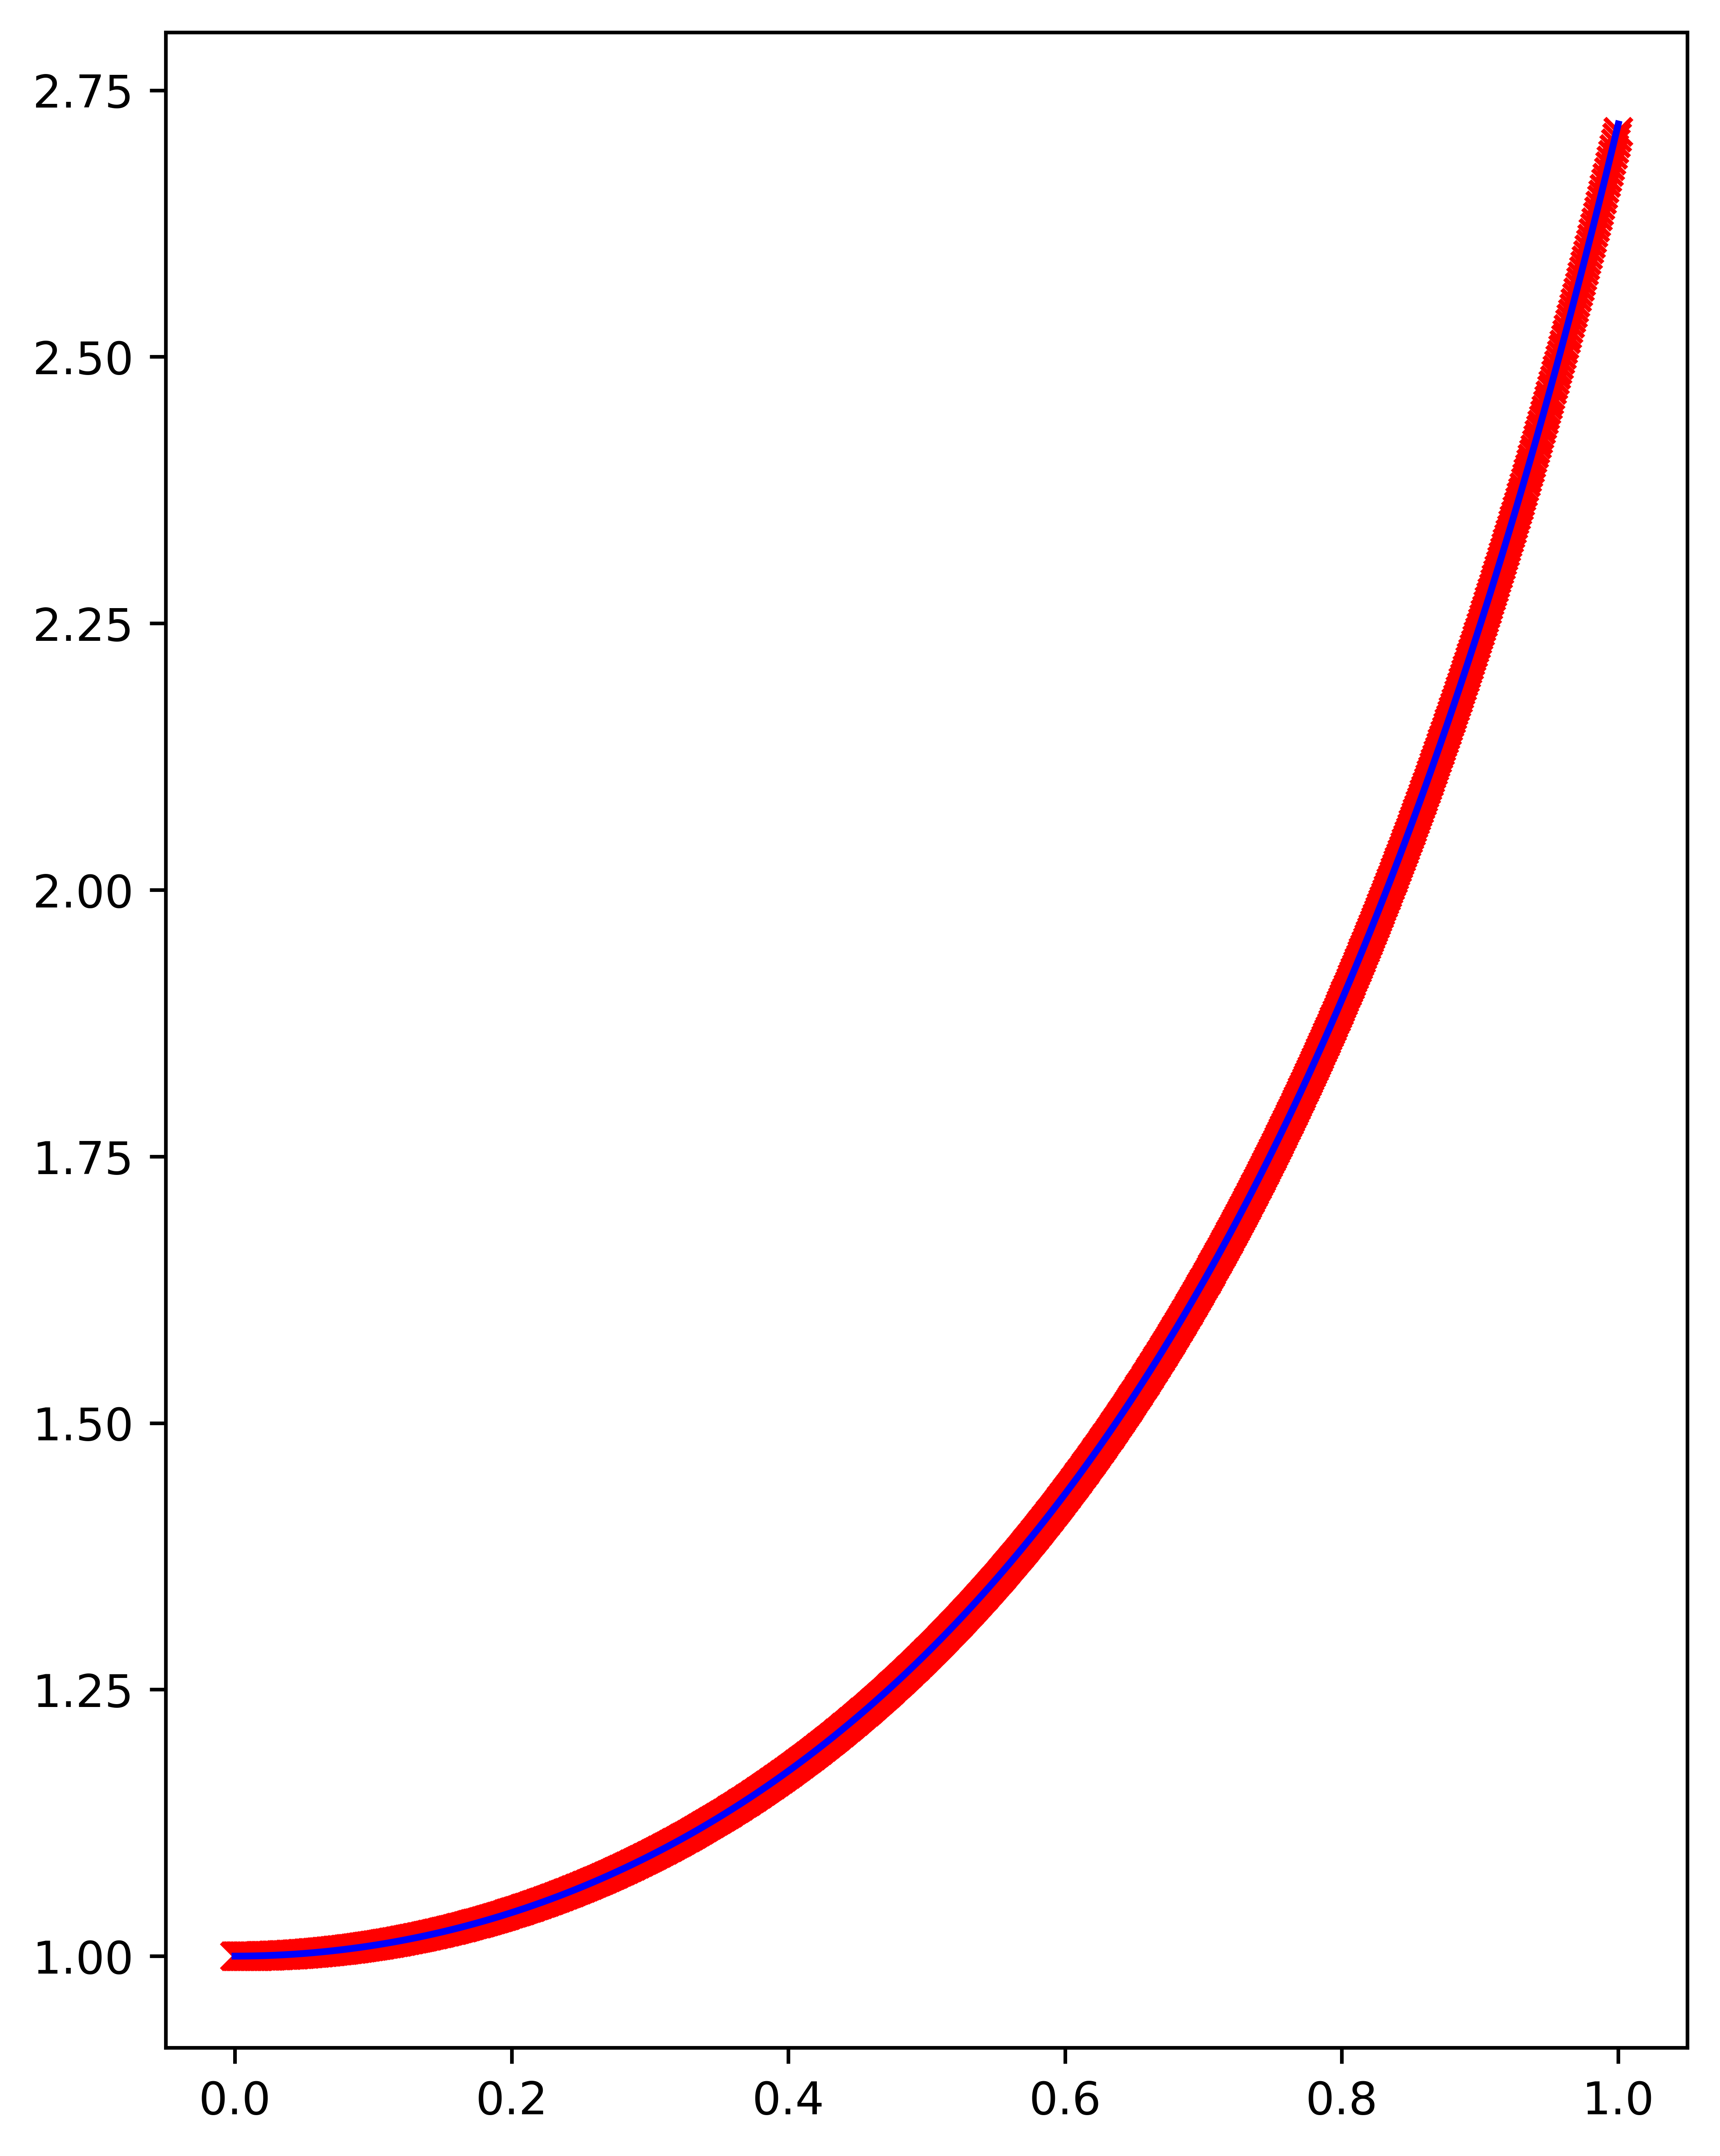

In [25]:
x = np.linspace(0, 1, 1000)
y1 = np.zeros_like(x)
y1[0] = 1
h = 1 / 1000
for i in range(999):
    y1[i+1] = y1[i] + h * f(x[i], y1[i])
plt.figure(dpi=800, figsize=(6,8))
plt.plot(x, y1,'xr')
plt.plot(x, np.exp(x*x), '-b')

In [28]:
y = np.exp(x ** 2)
err = abs(y - y1)


---
画一下热力图

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

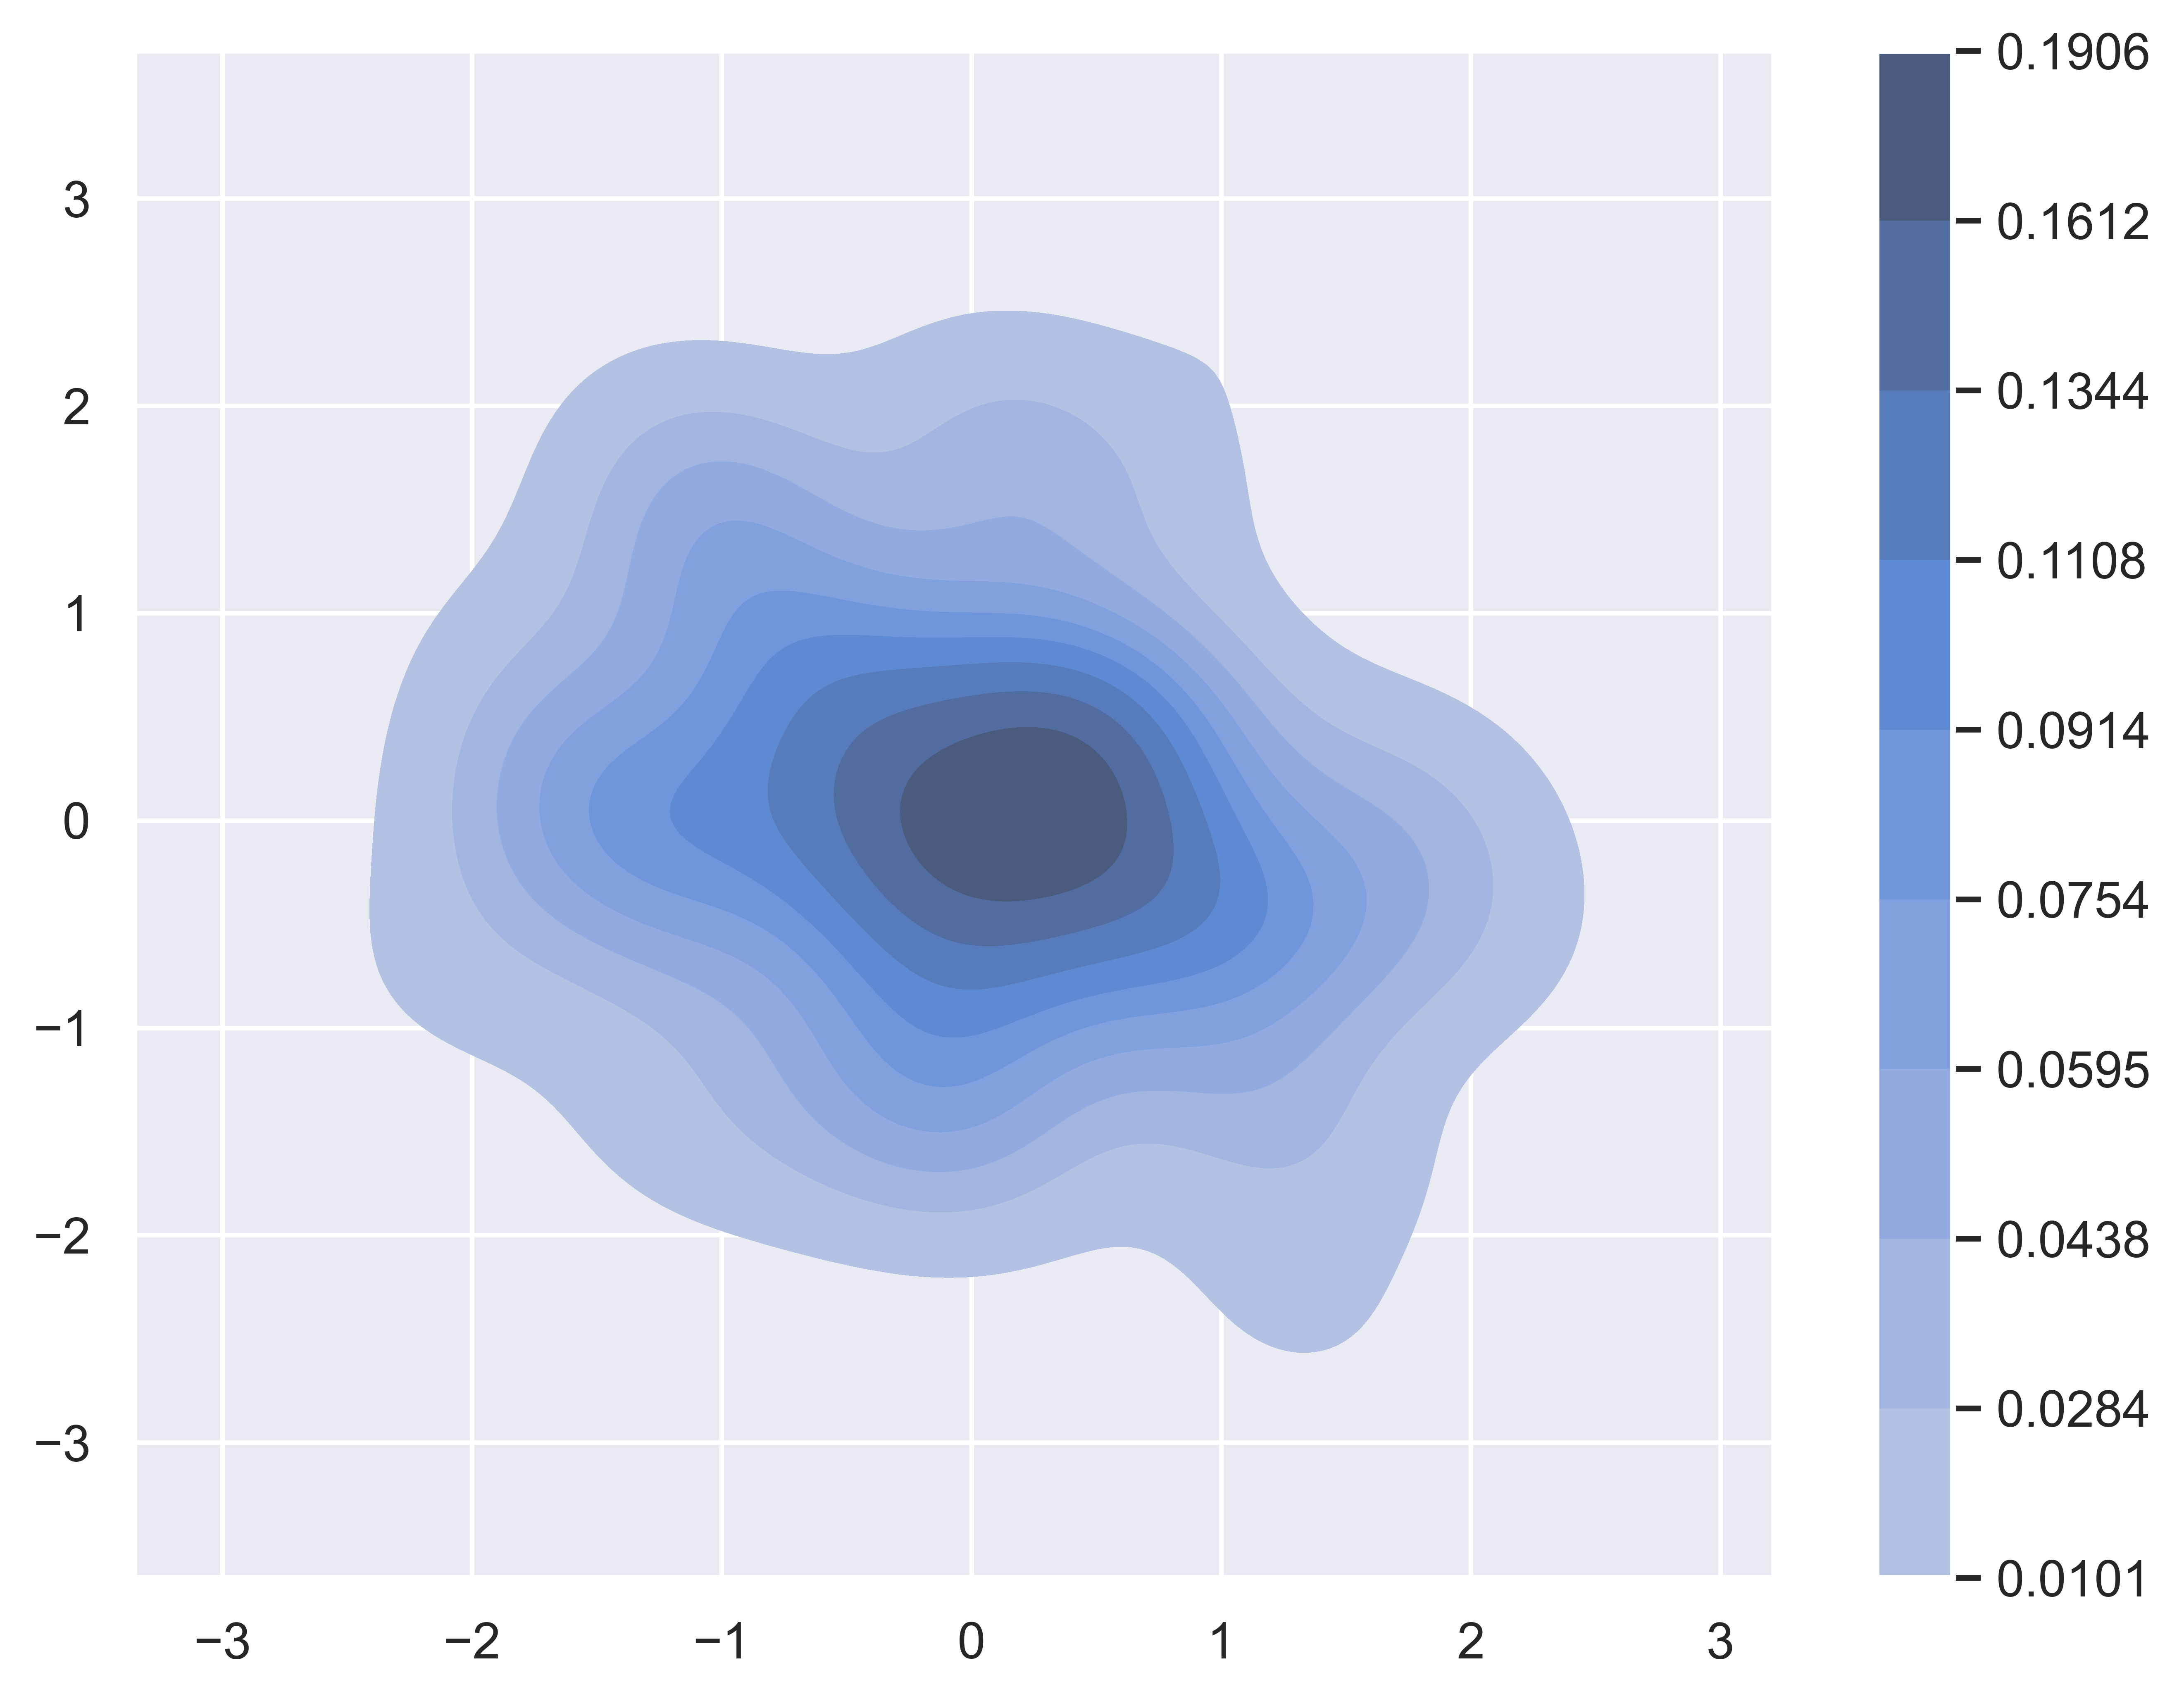

In [19]:
#sns.set()
plt.figure(dpi=800,figsize=(8,6))
x = np.random.randn(100)
y = np.random.randn(100)
sns.kdeplot(x=x,y=y,fill=True, cbar=True)


In [20]:
data = sns.load_dataset('flights').pivot('month','year','passengers')
data.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

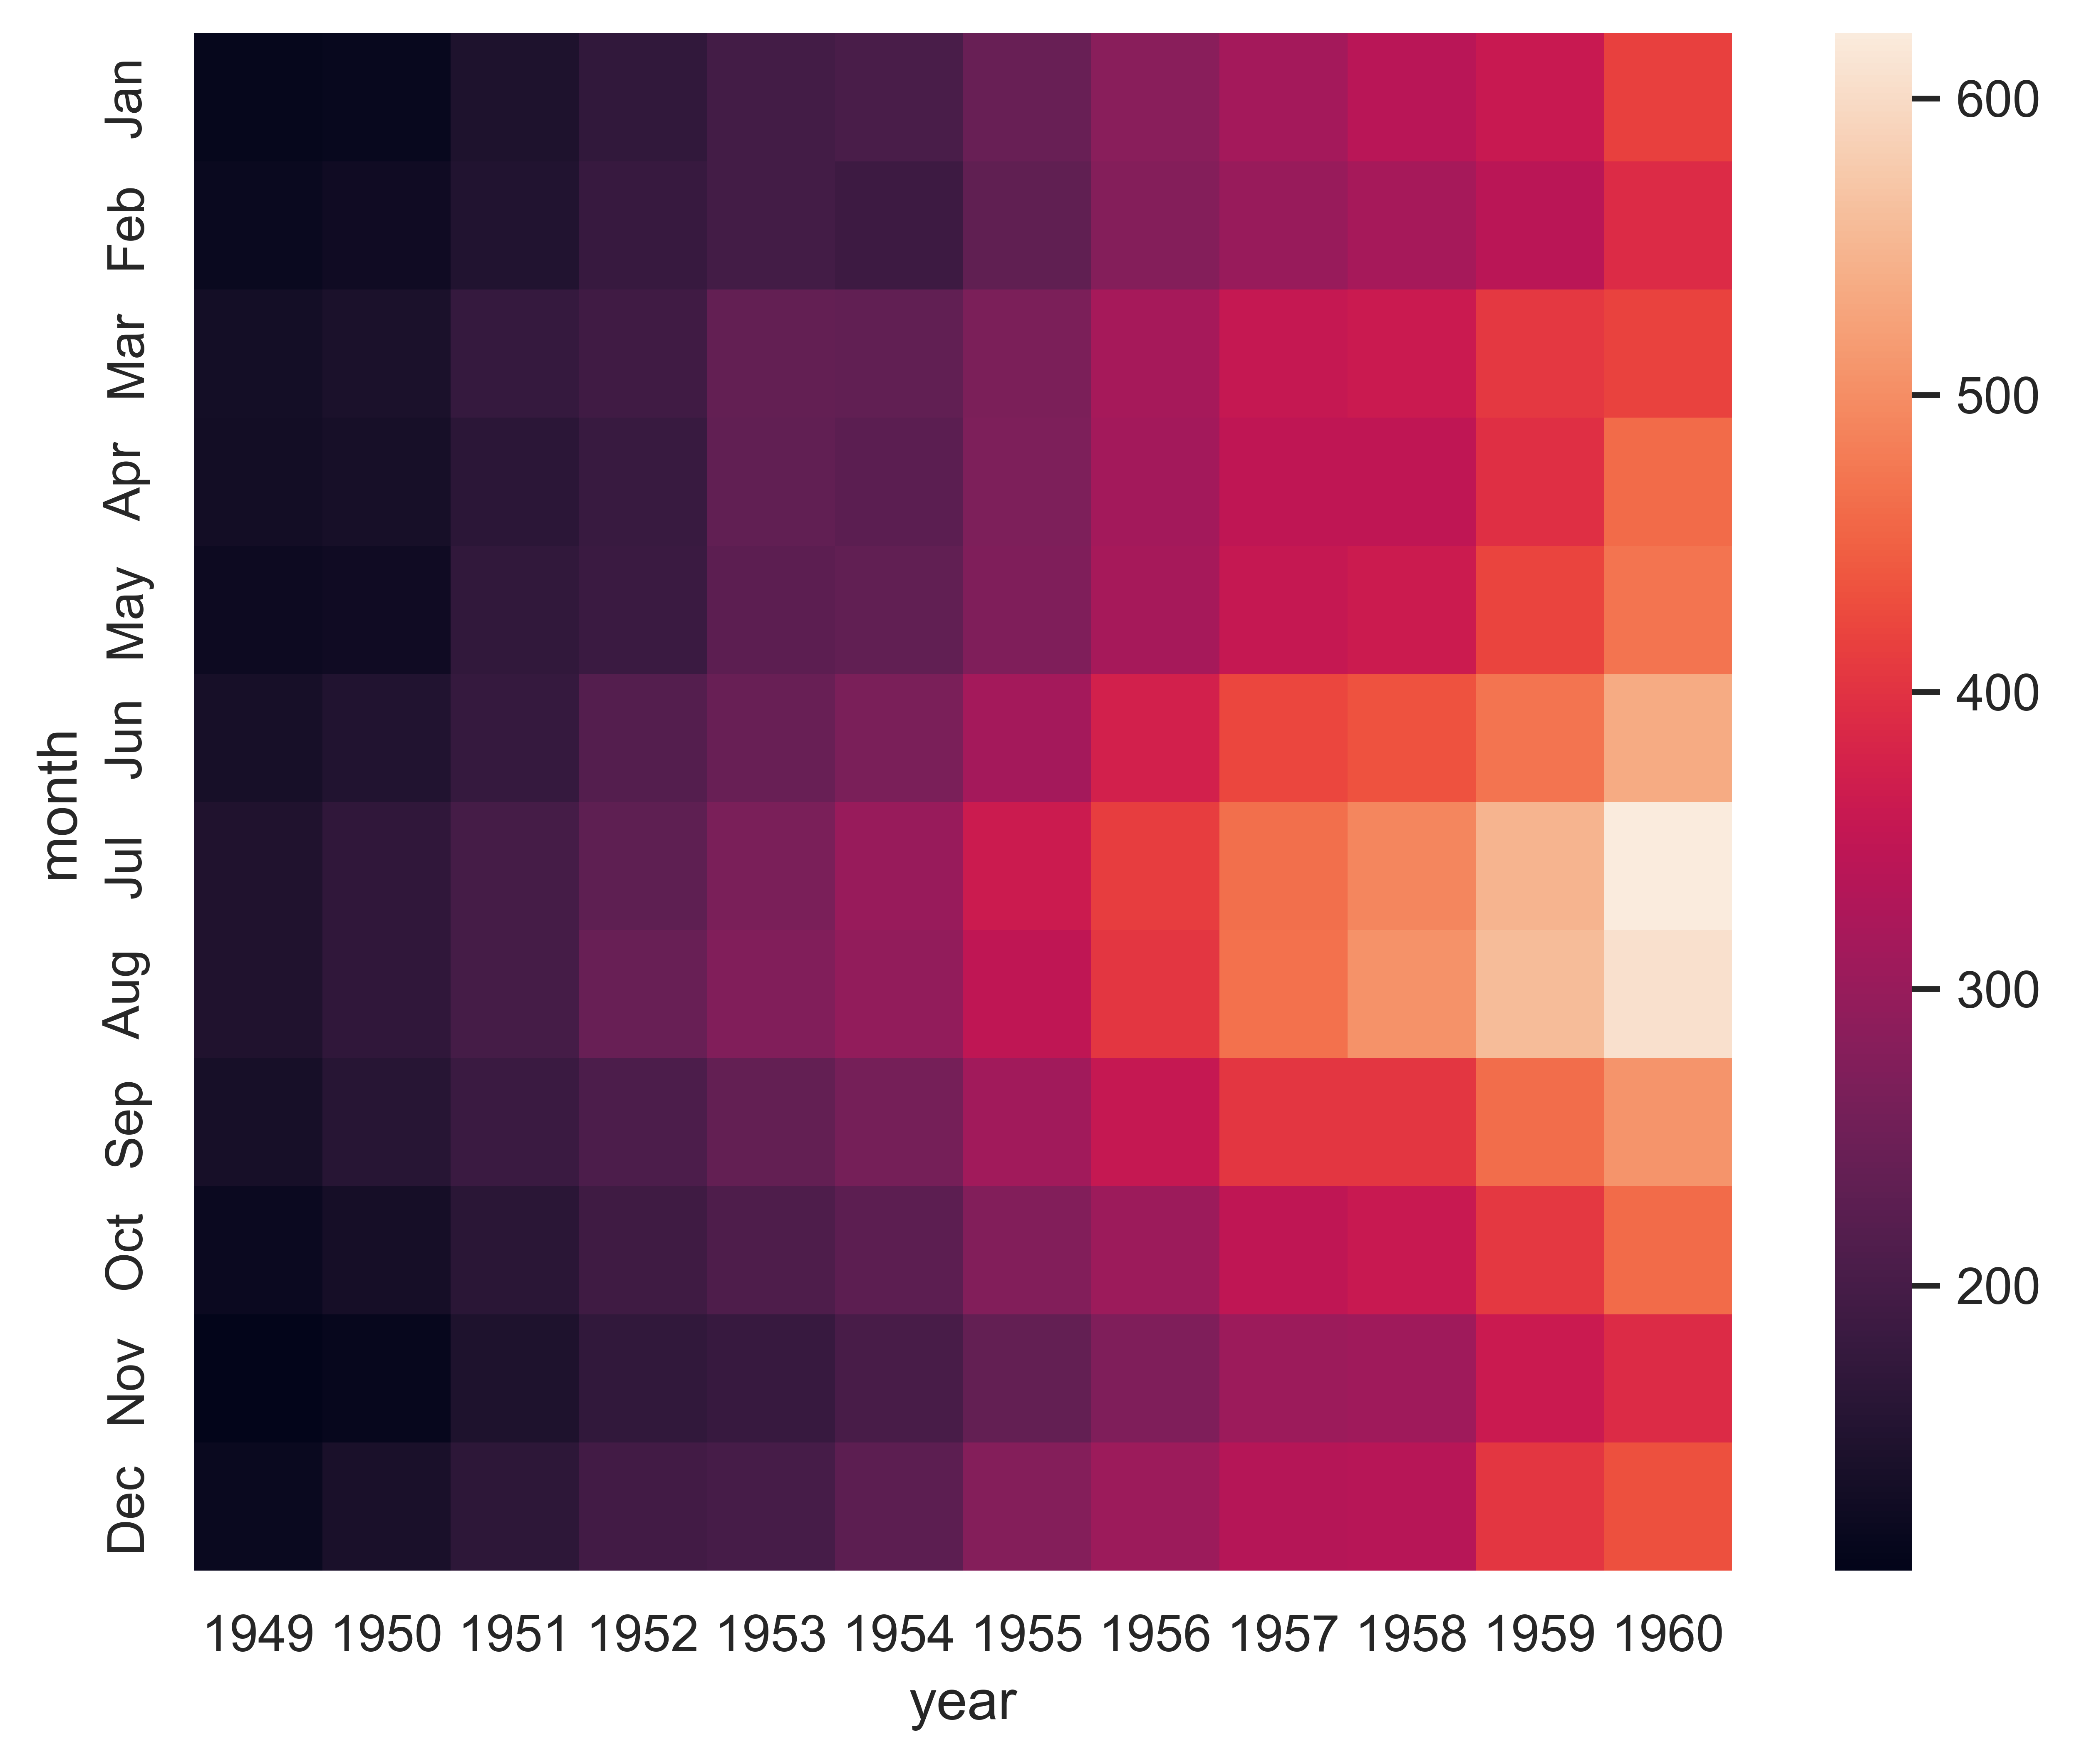

In [21]:
plt.figure(dpi=800, figsize=(8,6))
sns.heatmap(data=data, square=True)


<AxesSubplot:xlabel='year', ylabel='month'>

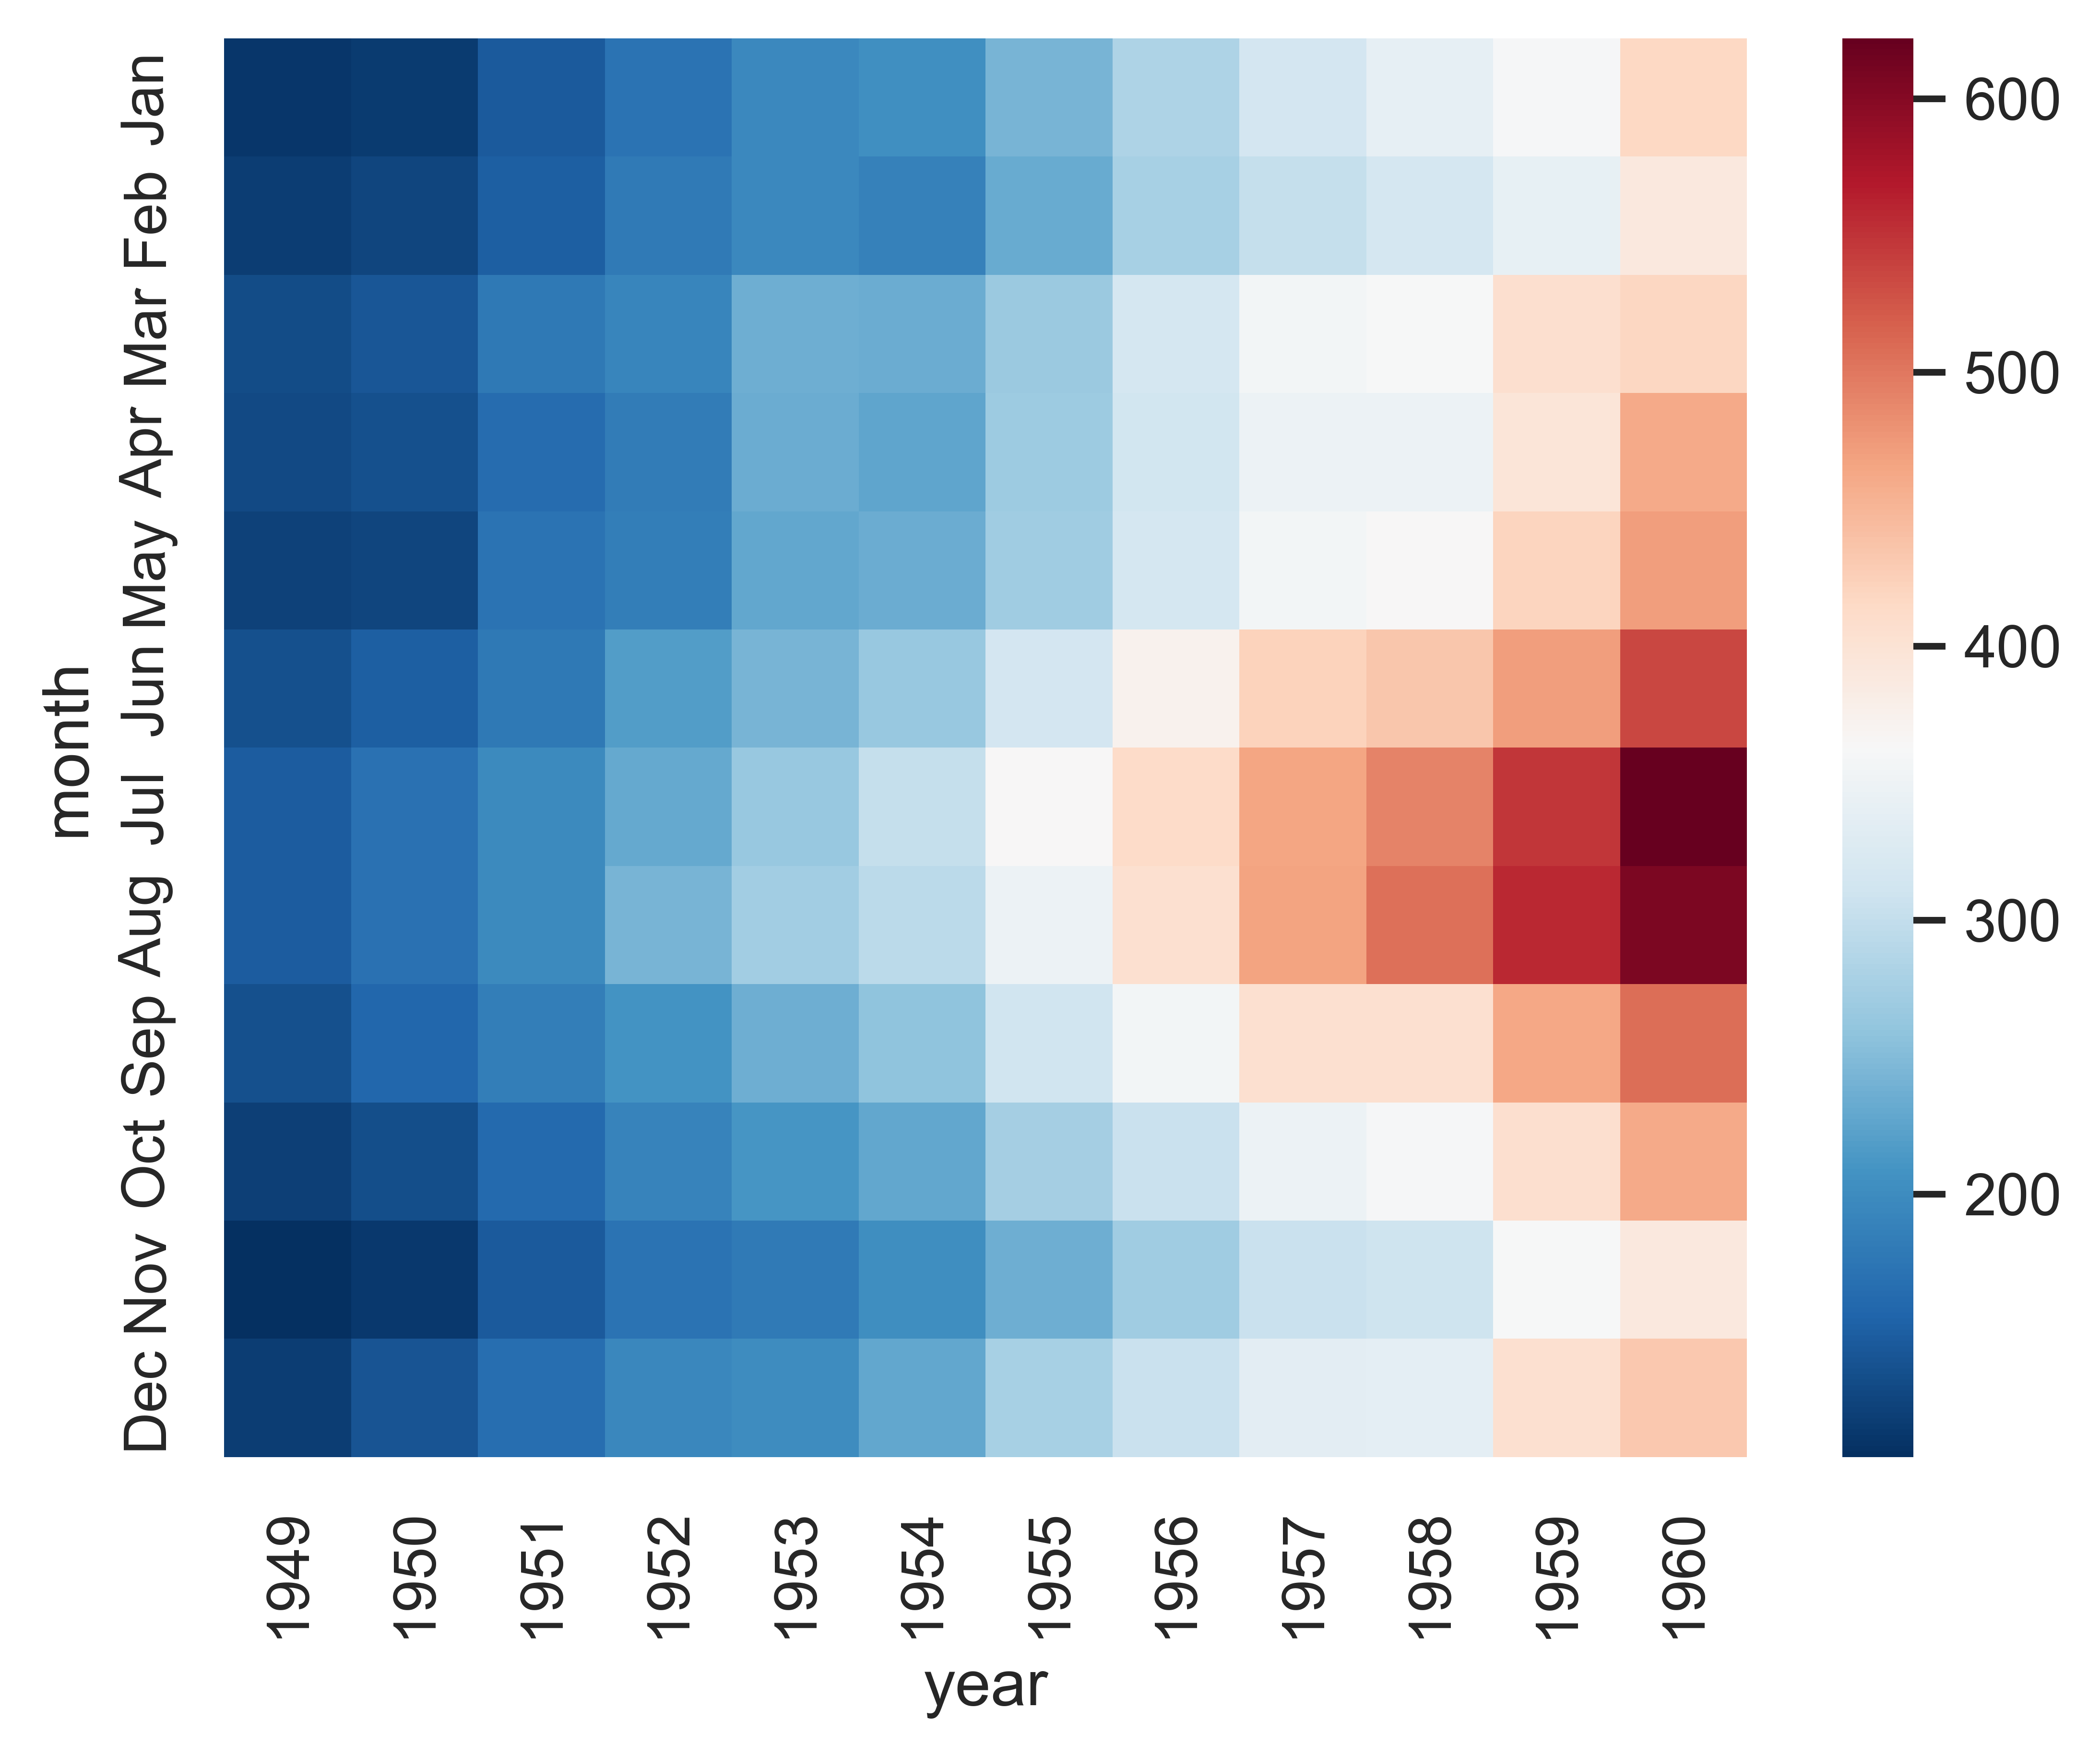

In [23]:
plt.figure(dpi=800)
sns.heatmap(data=data, cmap='RdBu_r')

## 微分方程数值解法(李荣华)

### 1.常微分方程的数值解法

#### 1.1 Euler

$\frac{dy}{dx}=\frac{y+x}{y-x},y(0)=1$

$y(x)=x+\sqrt{1+2x^2}$

In [125]:
import numpy as np 
import matplotlib.pyplot as plt 

In [120]:
#定义右端项
def f(x,y):
    return -y + x +1
def y_exc(x):
    '''精确解'''
    return x + np.exp(-x)


In [121]:
err = []
print(err)
plt.figure(dpi=600, figsize=(6,8))
for h in [0.1, 0.05, 0.025]:
    x = np.arange(0,2,step= h)
    y_com = np.zeros_like(x)
    y_com[0] = 1 
    for i in range(len(x) - 1):
        y_com[i+1] = y_com[i] + h * f(x[i], y_com[i])
    
    y_ex = y_exc(x)
    erro = abs(y_ex - y_com)
    # plt.subplot(211)
    # plt.plot(x, erro, label= f'h={h}')
    # plt.legend()
    # plt.subplot(212)
    # plt.plot(x, y_com, label = f'h={h}')
    # plt.legend()
    err0 = np.sum(abs(y_ex - y_com))/len(x)
    err = np.append(err, err0)






[]


<Figure size 3600x4800 with 0 Axes>

In [122]:
err,np.log2(err[1]/err[0]),err[2]/err[1]

(array([0.01509752, 0.00748681, 0.00372793]),
 -1.011888373019689,
 0.4979333089483995)

In [123]:
#改进欧拉
err1=[]
plt.figure(dpi=600, figsize=(6,8))
for h in [0.1, 0.05, 0.025]:
    x = np.arange(0,2,step= h)
    y_com1 = np.zeros_like(x)
    y_com1[0] = 1 
    for i in range(len(x) - 1):
        y_com1[i+1] = y_com1[i] + h * f(x[i], y_com1[i])
        y_com1[i+1] = y_com1[i] + (h/2) * (f(x[i],y_com1[i]) + f(x[i+1],y_com1[i+1]))
    
    y_ex = y_exc(x)
    erro1 = abs(y_ex - y_com1)
    # plt.subplot(211)
    # plt.plot(x, erro1, label= f'h={h}')
    # plt.legend()
    # plt.subplot(212)
    # plt.plot(x, y_com1, label = f'h={h}')
    # plt.legend()
    err01 = np.sum(abs(y_ex - y_com1))/len(x)
    err1 = np.append(err1, err01)

<Figure size 3600x4800 with 0 Axes>

In [124]:
err1 , err, abs(np.log2(err1[1]/err1[0])) ,err1[2]/err1[1]

(array([5.21092291e-04, 1.26996892e-04, 3.13421764e-05]),
 array([0.01509752, 0.00748681, 0.00372793]),
 2.0367457205073483,
 0.24679483011624273)

---------

In [5]:
uv = np.zeros(3)
uv

array([0., 0., 0.])

In [6]:
uv[1] = 2 
uv

array([0., 2., 0.])

In [13]:
uv.shape,
for i in range(len(uv)):
    print(i) 

0
1
2


In [15]:
uv1 = [1,2, 3]
uv-uv1

array([-1.,  0., -3.])

In [43]:
np.arange(0,1,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [127]:
np.linspace(0,2,3)

array([0., 1., 2.])

-----

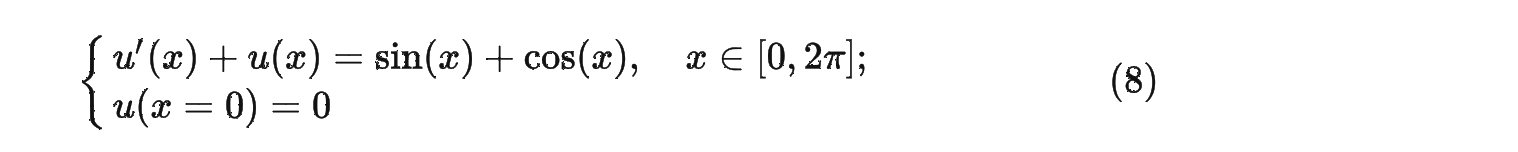

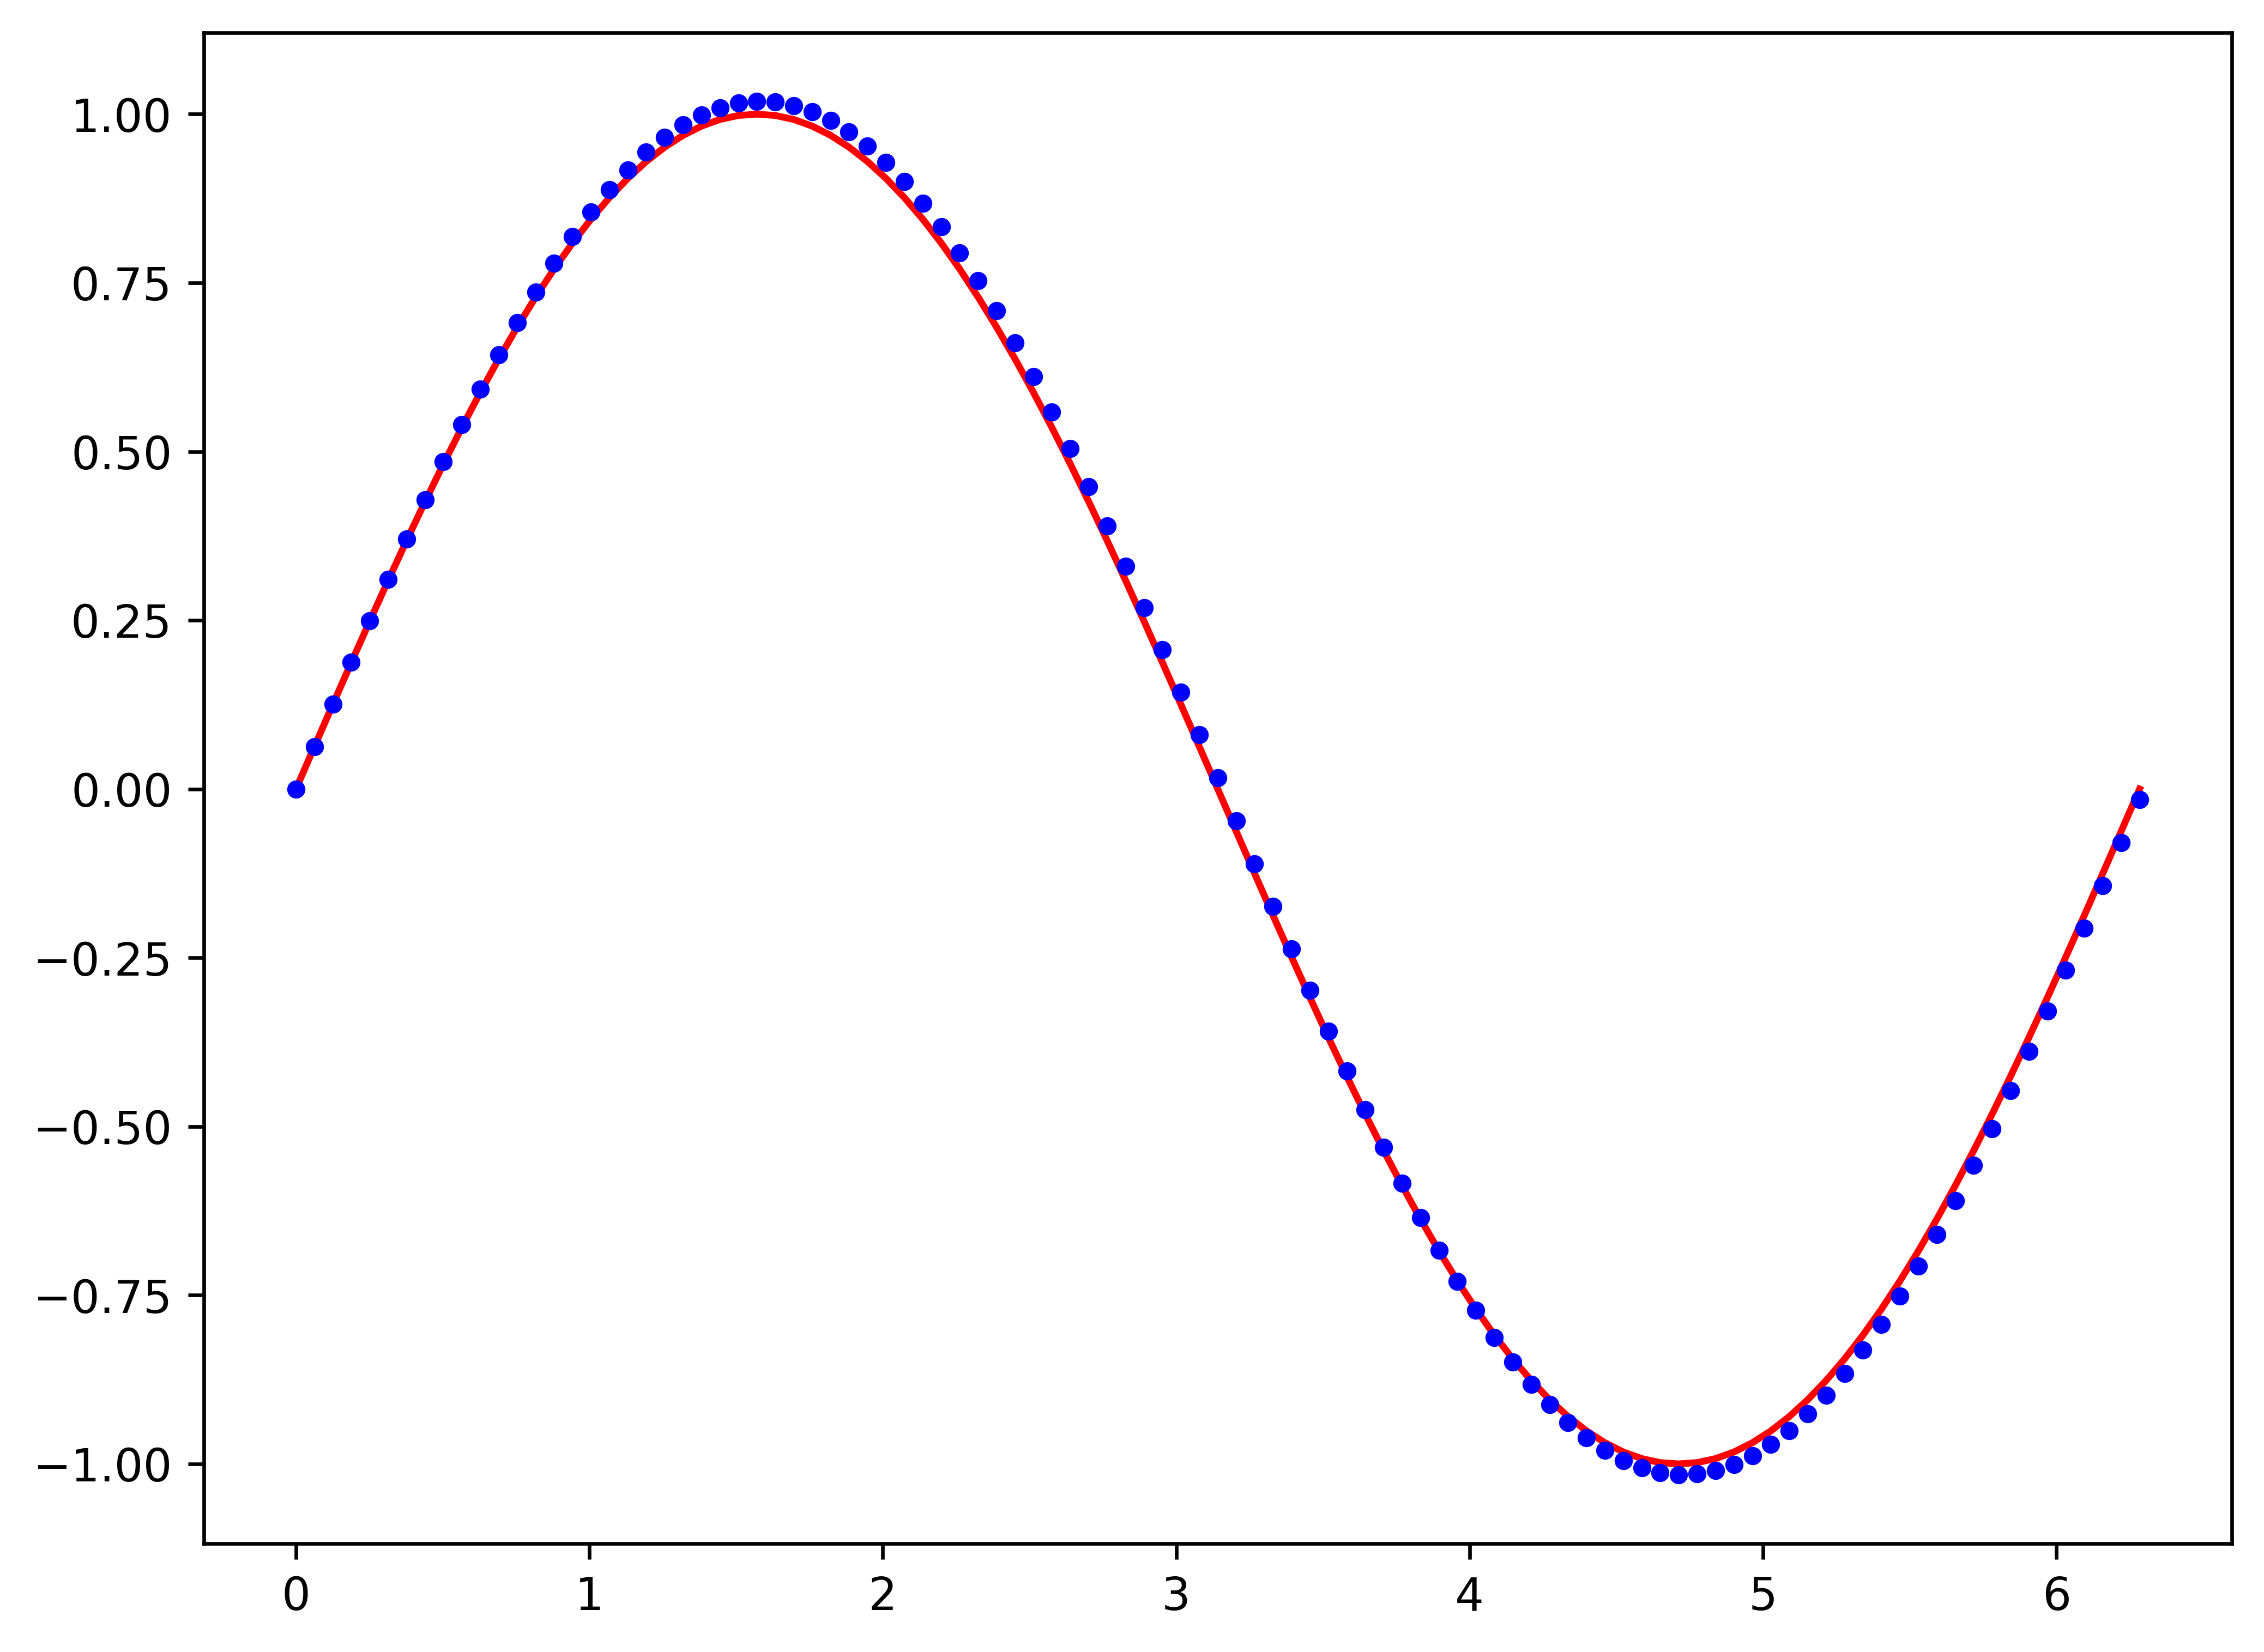

In [135]:
N =100
h = 2*np.pi / N
x = np.linspace(0, 2*np.pi, N+1)
A = np.zeros((N, N))
F = np.zeros((N, 1))
u = np.zeros((N+1, 1))
for i in range(N):
    A[i,i] = 1
    if i >0:
        A[i, i-1] = h-1
    F[i] = h * (np.sin(x[i]) + np.cos(x[i]))

u[1:] = np.dot(np.linalg.inv(A), F)

plt.figure(dpi=600, figsize=(8,6))
plt.plot(x, np.sin(x), '-r')
plt.plot(x, u, '.b')
        

### PDE

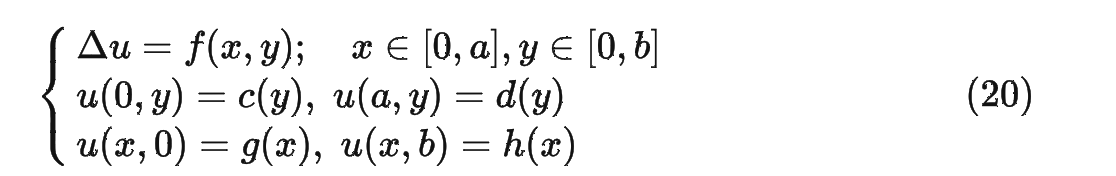
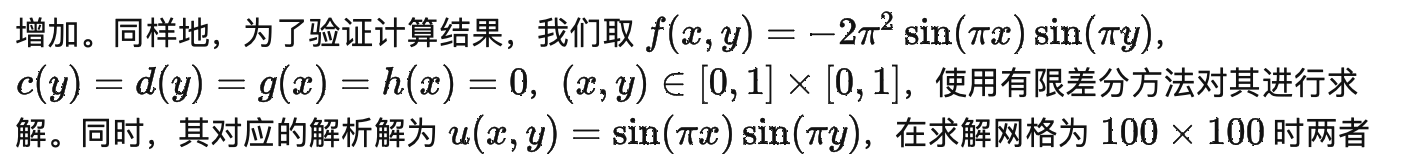

------

In [150]:
AA = np.empty((4,4),dtype=object)
for i in range(4):
    for j in range(4):
        if i == j :
            AA[i,j] = np.diag([1,1])
        elif abs(i-j) == 1:
            AA[i,j] = np.diag([2,2])
        else:
            AA[i,j] = np.zeros([2,2])

for A_i in AA:
    print(A_i, A_i.shape,'\n',A_i[1],A_i[1].shape, '\n',np.hstack(A_i))

print(type(AA))
# AA1 = vs


[array([[1, 0],
        [0, 1]]) array([[2, 0],
                        [0, 2]]) array([[0., 0.],
                                        [0., 0.]]) array([[0., 0.],
                                                          [0., 0.]])] (4,) 
 [[2 0]
 [0 2]] (2, 2) 
 [[1. 0. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 2. 0. 0. 0. 0.]]
[array([[2, 0],
        [0, 2]]) array([[1, 0],
                        [0, 1]]) array([[2, 0],
                                        [0, 2]]) array([[0., 0.],
                                                        [0., 0.]])] (4,) 
 [[1 0]
 [0 1]] (2, 2) 
 [[2. 0. 1. 0. 2. 0. 0. 0.]
 [0. 2. 0. 1. 0. 2. 0. 0.]]
[array([[0., 0.],
        [0., 0.]]) array([[2, 0],
                          [0, 2]]) array([[1, 0],
                                          [0, 1]]) array([[2, 0],
                                                          [0, 2]])] (4,) 
 [[2 0]
 [0 2]] (2, 2) 
 [[0. 0. 2. 0. 1. 0. 2. 0.]
 [0. 0. 0. 2. 0. 1. 0. 2.]]
[array([[0., 0.],
        [0., 0.]]) arr

In [156]:
# test
xx = np.linspace(0,2,5)
yy = np.linspace(1,2,5)
print(xx[1:5].shape), 
xx[1:5].reshape((4,1)) * yy[2]


(4,)


array([[0.75],
       [1.5 ],
       [2.25],
       [3.  ]])

-----

In [177]:
#划分网格
M, N = 100, 100
a, b = 1, 1
dx = a/M
dy = b/N
x_i = np.linspace(0, a, M+1)
y_i = np.linspace(0, b, N+1)
#设定参数
p = 1/dx ** 2
q = 1/dy ** 2
r = -2 * (p + q)

U = np.zeros((M-1, M-1))
for i in range(M-1):
    U[i, i] = r
    if i < M-2:
        U[i,i+1] = p
    if i > 0:
        U[i,i-1] = p

V = np.diag([q] * (M-1))
zero_blo = np.zeros((M-1, M-1))
# A的分块形式
A_blo = np.empty((N-1, N-1), dtype = object)
for i in range(N-1):
    for j in range(N-1):
        if i == j:
            A_blo[i, j] = U
        elif abs(i-j) == 1:
            A_blo[i, j] = V
        else:
            A_blo[i, j] = zero_blo

A = np.vstack(np.hstack(i) for i in A_blo)
#方程右端项
F = np.vstack([-2 * np.pi **2 * np.sin(np.pi * x_i[1:M].reshape((M-1, 1))) * np.sin(np.pi * i) for i in y_i[1:N]])

u = np.dot(np.linalg.inv(A), F).reshape(M-1, N-1)
# 组装完整的解
u_f = np.vstack([np.zeros((1, M+1)),
                 np.hstack([np.zeros((N-1,1)), u, np.zeros((N-1, 1))]),
                 np.zeros((1,M+1))])


/var/folders/nn/lr5td5393gg0lt4ddnbj8pbr0000gn/T/ipykernel_80075/2695467782.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  A = np.vstack(np.hstack(i) for i in A_blo)


-----
生成网格

In [162]:
xx = np.array([1,2,3])
yy = np.array([4,5,6])
xx1, yy1 = np.meshgrid(xx, yy)
xx1, yy1

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]))

In [165]:
xx1.shape, xx1.size
u_f.shape, u_f.size

((101, 101), 10201)

-------

In [178]:
xx, yy = np.meshgrid(x_i, y_i)
u_ext = np.sin(np.pi * xx) * np.sin(np.pi * yy)
u_err = np.sum(abs(u_ext - u_f))/u_ext.size
u_err

3.267277235444994e-05

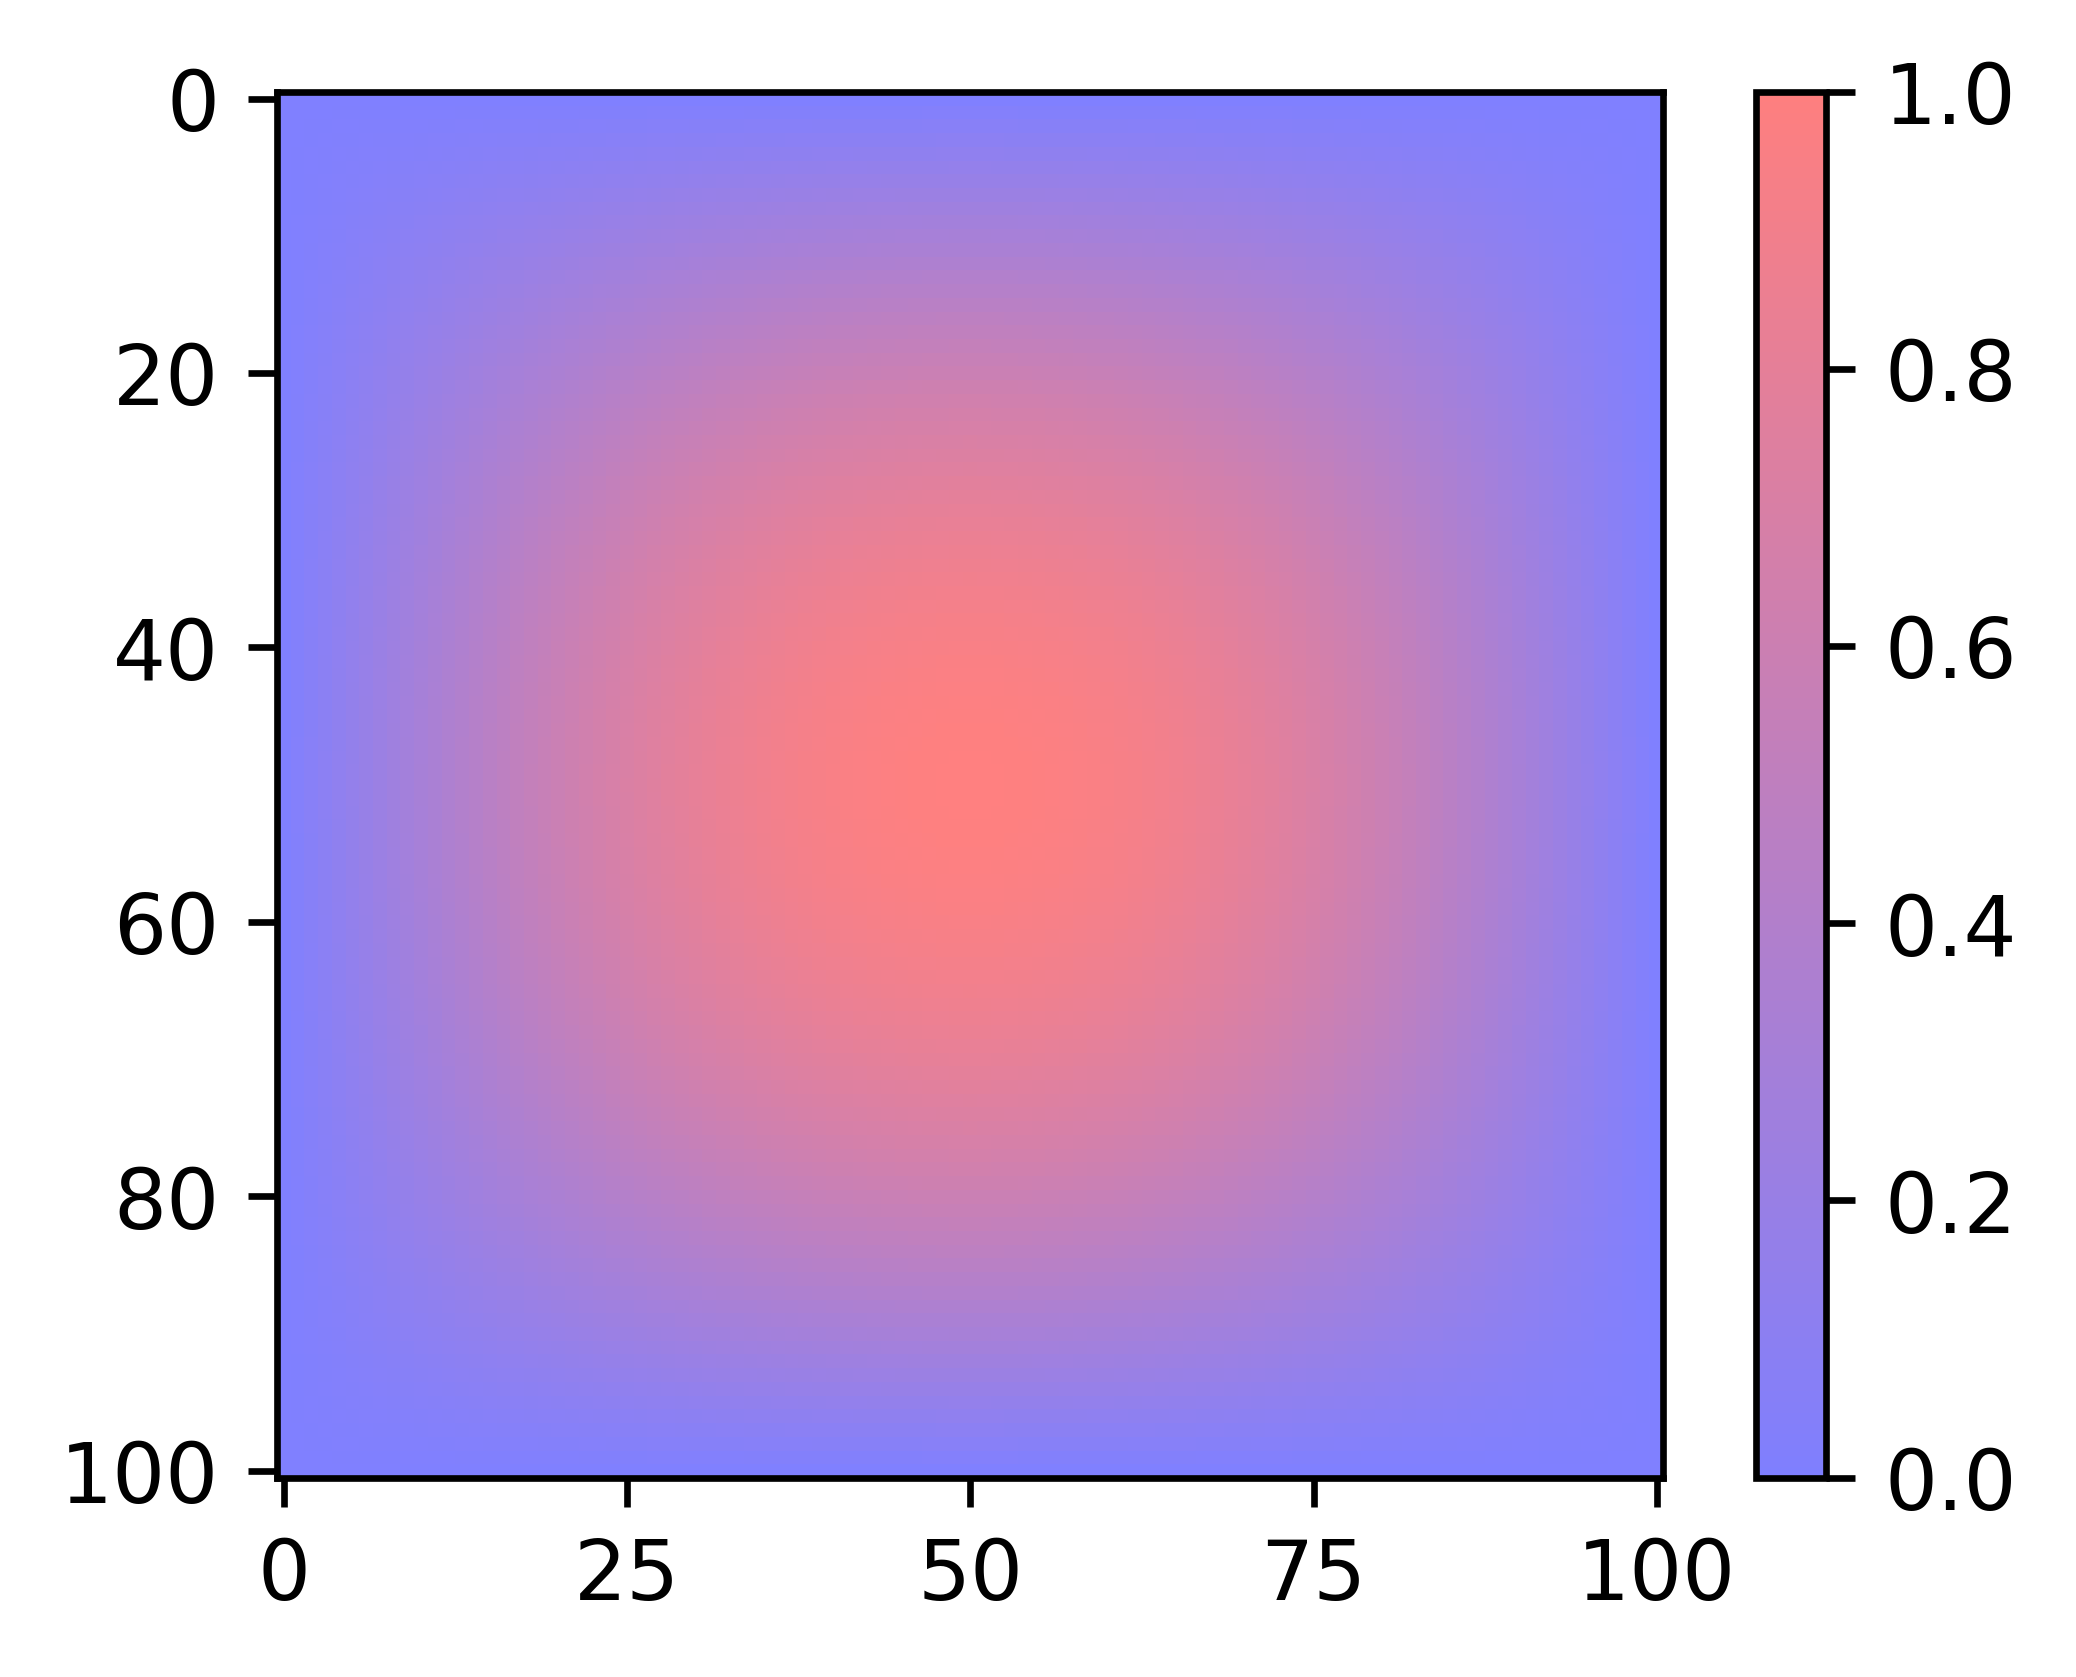

In [179]:
#绘制图像
import matplotlib.colors as col
plt.figure(dpi=600, figsize=(4,3))
cmap = col.LinearSegmentedColormap.from_list('cmap1', ['blue', 'red'])
plt.imshow(u_f, cmap=cmap, alpha=0.5)

plt.colorbar()
plt.show()


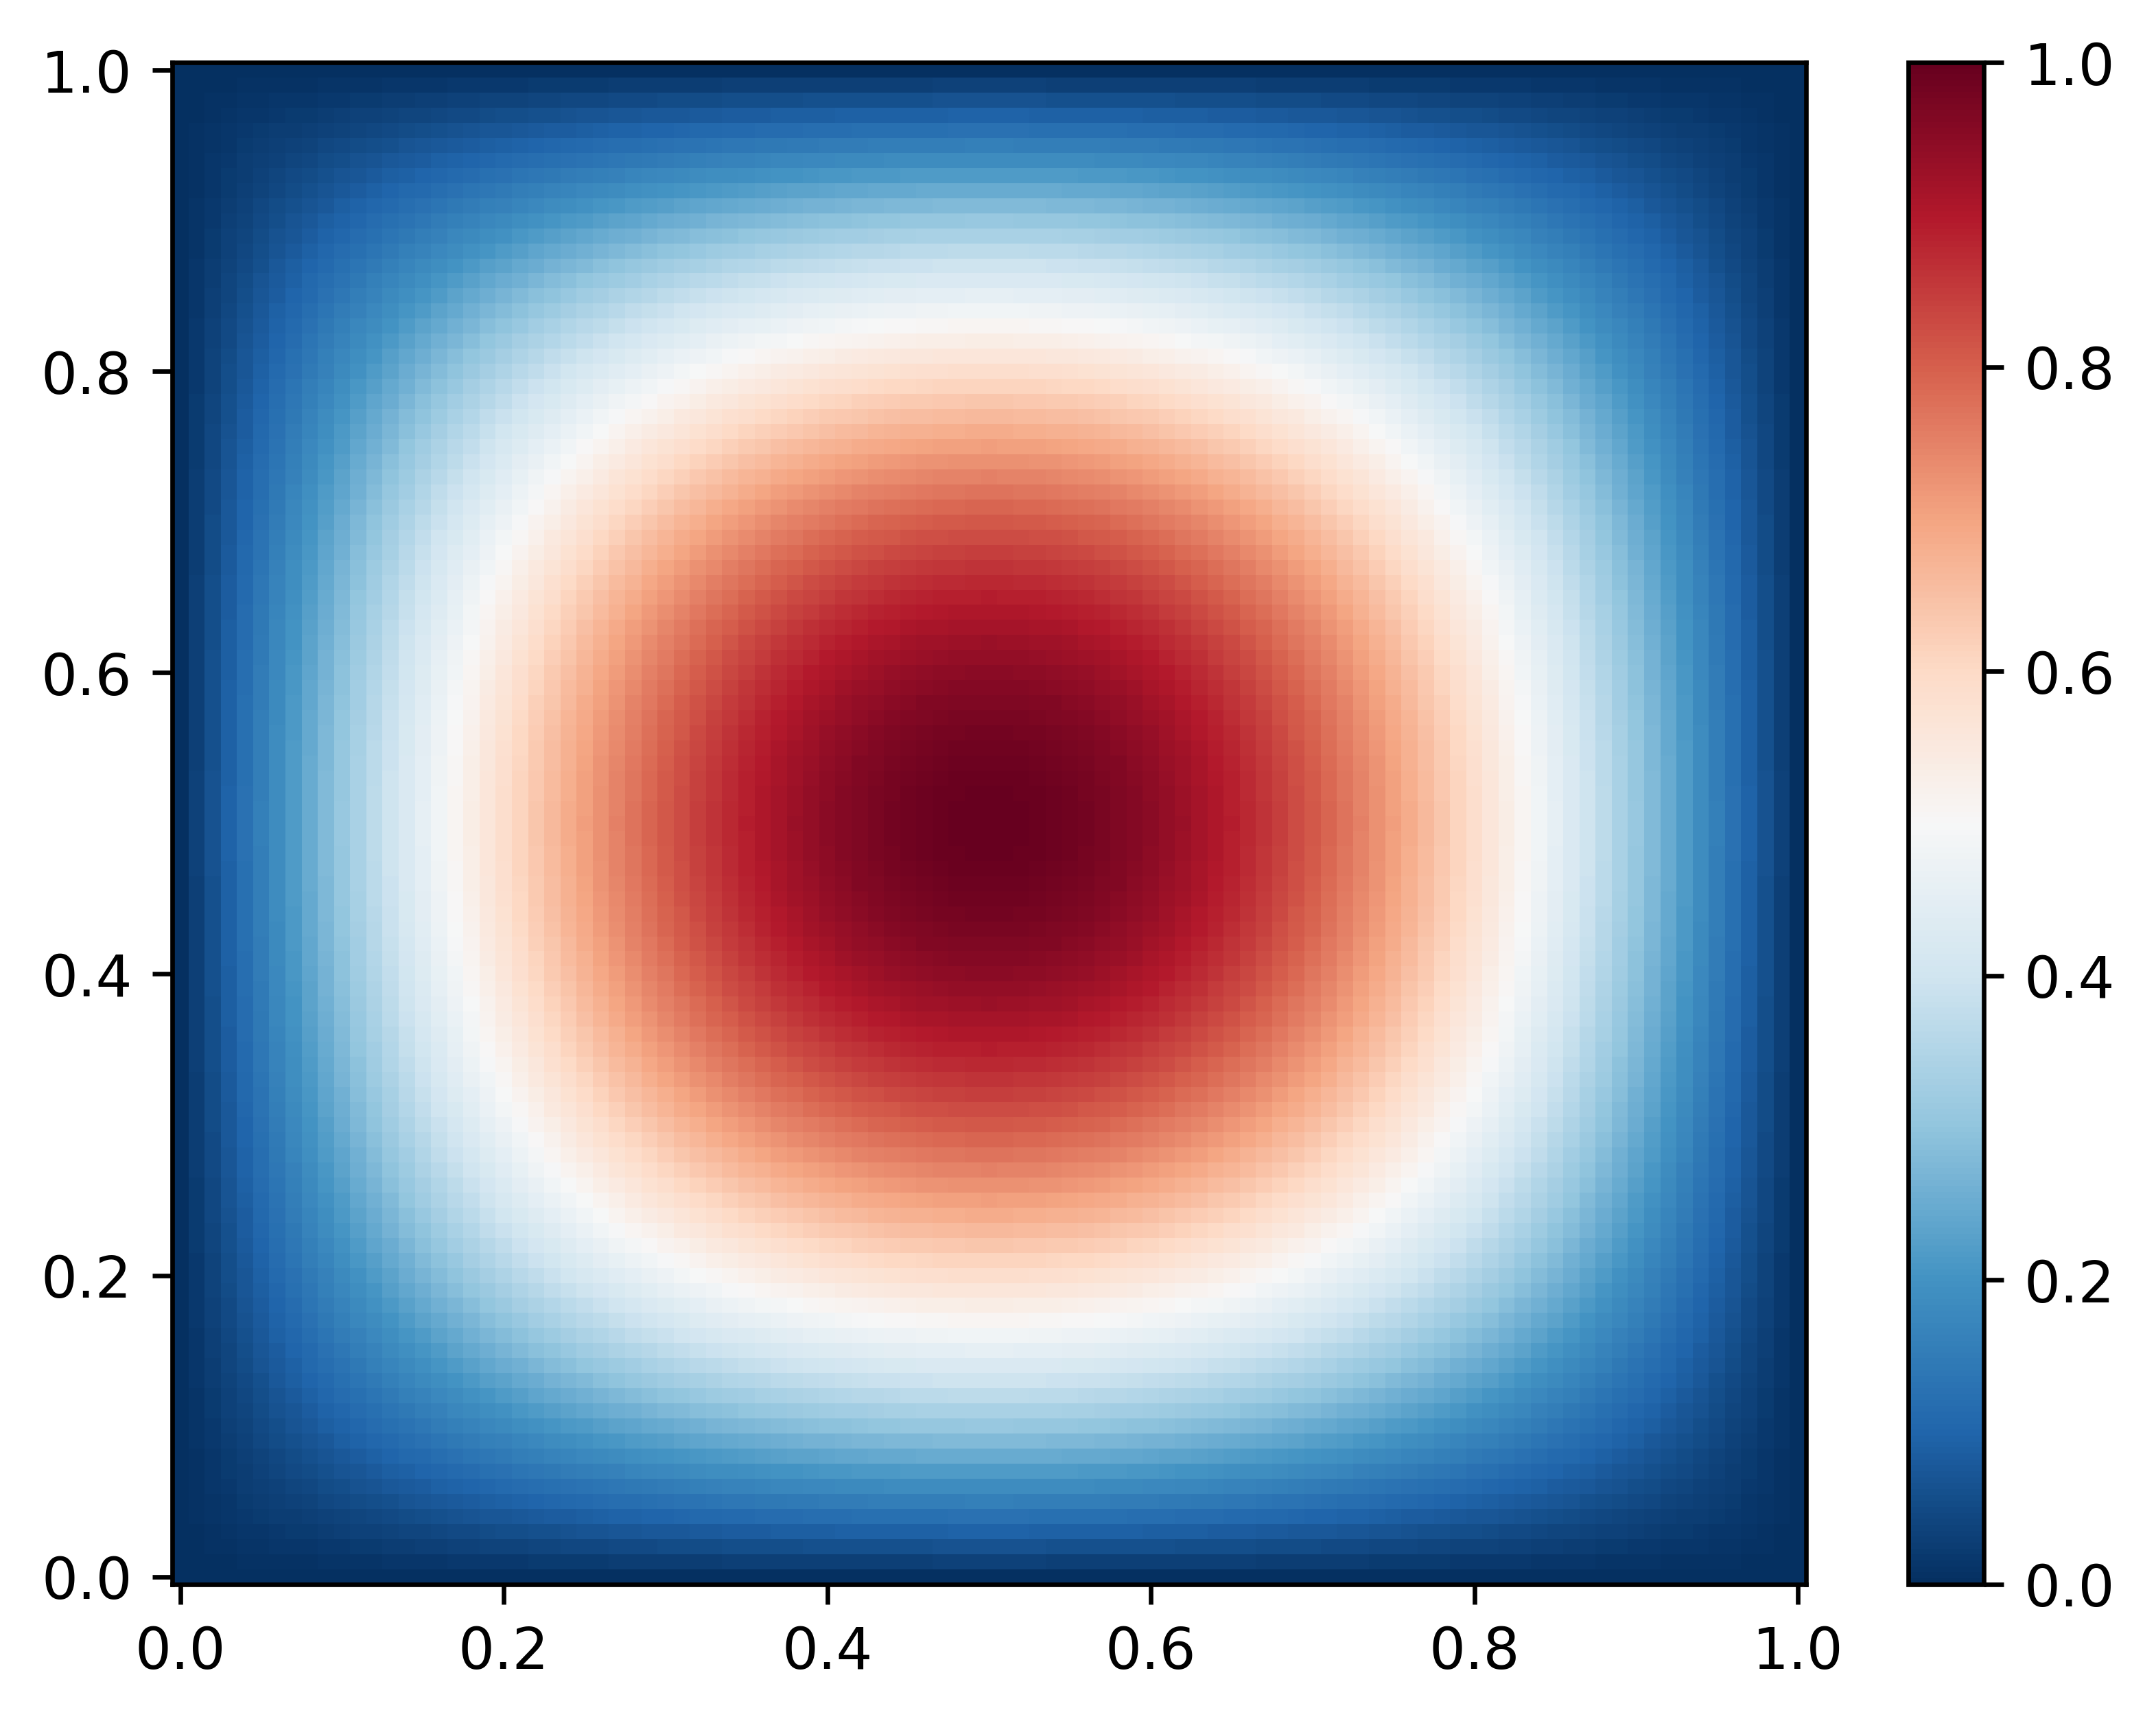

In [187]:
plt.figure(dpi=600)
plt.pcolormesh(x_i, y_i, u_f,cmap='RdBu_r')
plt.colorbar()